In [1]:
import pandas as pd
import polaris as po
import numpy as np

/home/hmacdope/mambaforge/envs/polaris_new2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
admet_dataset = po.load_dataset("asap-discovery/antiviral-admet-2025-unblinded")

⠴ Fetching dataset... 

2025-07-09 11:53:09.566 | INFO     | polaris._artifact:_validate_version:84 - The version of Polaris that was used to create the artifact (0.11.8.dev4+g40e3b2b.d20250207) is different from the currently installed version of Polaris (0.9.2).
2025-07-09 11:53:09.566 | WARNING  | polaris.dataset._base:zarr_root:179 - You're loading data from a remote location. If the dataset is small enough, consider caching the dataset first using DatasetV2.cache() for more performant data access.


✅ SUCCESS: Fetched dataset.
 


/home/hmacdope/mambaforge/envs/polaris_new2/lib/python3.10/site-packages/yaspin/core.py:239: UserWarning: color, on_color and attrs are not supported when running in jupyter
  self._color = self._set_color(value) if value else value


In [48]:
submissions = pd.read_json("../HMO_from_polaris/latest_competition_prediction.json")


In [4]:
submissions

,id,created_at,deleted_at,name,slug,description,tags,user_attributes,access,is_certified,is_featured,polaris_version,owner_id,creator_id,competition_id,predictions,results,github_url,report_url
0,competition-prediction-qg5PVWDLbiN5ndytwYPta,2025-02-26 16:31:25.637415+00:00,NaT,BALM_potency_few_shot,balm-potency-few-shot,"BALM, few shot learning",[],{'Method': 'BALM'},public,False,False,0.11.8,8ZKQKFE9xTEUExcMaJNg4,8ZKQKFE9xTEUExcMaJNg4,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [4.96794986...,"[{'scores': {'CLD': 't', 'R²': '0.194 ± 0.038'...",None,https://github.com/meyresearch/polaris_challen...
1,competition-prediction-a9l9rEDGgw5wDcnMn3fud,2025-03-13 20:56:51.741258+00:00,NaT,asapdiscovery_ml_gat,asapdiscovery-ml-gat,Predictions made by a GAT model trained using ...,[],"{'Model': 'GAT', 'Framework': 'asapdiscovery-m...",public,False,False,0.11.9,AEMymAUQxGDjos3FzZ8E5,AEMymAUQxGDjos3FzZ8E5,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.55951023...,"[{'scores': {'CLD': 'p', 'R²': '0.313 ± 0.046'...",https://github.com/kaminow/asap-polaris-challe...,https://github.com/kaminow/asap-polaris-challe...
2,competition-prediction-JMFyxShsgcjYFnRzZQFFK,2025-03-13 16:28:10.171798+00:00,NaT,potency-prediction,potency-prediction,Predictions from potency-prediction-pipeline u...,"[rdkit, ensemble, scaffold-split]",{},public,False,False,0.11.9,C7ibMkBrX6uTYUKUyMANu,C7ibMkBrX6uTYUKUyMANu,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.34203960...,"[{'scores': {'CLD': 'f', 'R²': '0.575 ± 0.039'...",https://github.com/fulopjoz/polaris-antiviral-...,https://tinyurl.com/dodo-potency
3,competition-prediction-pr9pVVQedDD3mD0WXrWMg,2025-03-13 23:45:22.831273+00:00,NaT,ucbbind,ucbbind,ucbbind first submission,[potency-predict],{'Method': '1D-CNN + KNN for nearest neighbor ...,public,False,False,0.11.7,DXCx5ew2mA9psvLPwBYmv,DXCx5ew2mA9psvLPwBYmv,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.45914277...,"[{'scores': {'CLD': 'q', 'R²': '0.319 ± 0.045'...",https://github.com/KSUN63/Polaris-Submission,https://docs.google.com/document/d/1YVxVi-zMc7...
4,competition-prediction-ReoR53l5wBTRr6Py011Fn,2025-03-14 07:28:13.271737+00:00,NaT,Physics_Informed_Linear_Model_pIC50_Prediction,physics-informed-linear-model-pic50-prediction,Submission of predicted pIC50 values for MERS-...,"[MERS-CoV, SARS-CoV-2, pIC50, Linear Regressio...",{},public,False,False,0.11.8,EvkoUyLA330ffFW9K7uuM,EvkoUyLA330ffFW9K7uuM,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.02625437...,"[{'scores': {'CLD': 's', 'R²': '0.299 ± 0.041'...",None,https://drive.google.com/file/d/1xrmgHAFcyRDAG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,competition-prediction-SXMdEmccFmbNBtiVCZvp9,2025-03-14 15:17:26.874674+00:00,NaT,protocol1,protocol1,,[],{},public,False,False,0.11.5,hVNPTQAK92Rrggu5isbws,hVNPTQAK92Rrggu5isbws,competition-UkJQVGKUA7TMNwRHVp7nb,{'test': {'Ligand Pose': ['776t3gAAAAAQAAAAAgA...,"[{'scores': {'CLD': 'b', 'Average RMSD': '1.38...",None,https://docs.google.com/document/d/1e4ot7699vR...
91,competition-prediction-JLy17Fu87yM2ch741quDp,2025-03-14 15:58:04.273527+00:00,NaT,my-second-predictions-for-pose,my-second-predictions-for-pose,,[],{},public,False,False,0.11.9,kY9WTSWZwwdmKjednWcYW,kY9WTSWZwwdmKjednWcYW,competition-UkJQVGKUA7TMNwRHVp7nb,{'test': {'Ligand Pose': ['776t3gAAAAAQAAAAAgA...,"[{'scores': {'CLD': 's', 'Average RMSD': '21.1...",None,https://github.com/yul533/polaris-antiviral-ch...
92,competition-prediction-MoEWcKkwYkPeFHrw3qaWd,2025-03-14 13:43:49.815604+00:00,NaT,yzma-first-predictions-VINA-mmff94-25-fix152,yzma-first-predictions-vina-mmff94-25-fix152,Just testing the Polaris API here!,[tutorial],"{'Method': 'Dummy Baseline', 'Framework': 'RDK...",public,False,False,0.11.8,rrBijer4tbCuFpkxKQlc9,rrBijer4tbCuFpkxKQlc9,competition-UkJQVGKUA7TMNwRHVp7nb,{'test': {'Ligand Pose': ['776t3gAAAAAQAAAAAgA...

In [5]:
def determine_subchallenge(data):
    sub = data["test"]
    if "Ligand Pose" in sub.keys():
        challenge = "Ligand Pose"
    elif "pIC50 (MERS-CoV Mpro)" and "pIC50 (SARS-CoV-2 Mpro)" in sub.keys():
        challenge = "Potency"
    elif "HLM" and "MLM" in sub.keys():
        challenge = "ADMET"
    else:
        raise ValueError()
    return challenge

In [6]:
submissions["subchallenge"] = submissions["predictions"].apply(determine_subchallenge)
submissions["predictions_unnested"] = submissions["predictions"].apply(lambda x: x["test"])

In [7]:
admet_dataset = po.load_dataset("asap-discovery/antiviral-admet-2025-unblinded")

admet_data = pd.DataFrame(admet_dataset[:])

⠹ Fetching dataset... 

2025-07-09 11:53:11.652 | INFO     | polaris._artifact:_validate_version:84 - The version of Polaris that was used to create the artifact (0.11.8.dev4+g40e3b2b.d20250207) is different from the currently installed version of Polaris (0.9.2).
2025-07-09 11:53:11.653 | WARNING  | polaris.dataset._base:zarr_root:179 - You're loading data from a remote location. If the dataset is small enough, consider caching the dataset first using DatasetV2.cache() for more performant data access.


✅ SUCCESS: Fetched dataset.
 


/home/hmacdope/mambaforge/envs/polaris_new2/lib/python3.10/site-packages/yaspin/core.py:239: UserWarning: color, on_color and attrs are not supported when running in jupyter
  self._color = self._set_color(value) if value else value


In [8]:
admet_data

,CXSMILES,HLM,KSOL,LogD,MDR1-MDCKII,MLM,Molecule Name,Set
0,COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...,NaN,NaN,0.3,2.0,NaN,ASAP-0032437,Train
1,O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...,NaN,333.0,2.9,0.2,NaN,ASAP-0031915,Train
2,O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...,NaN,NaN,0.4,0.5,NaN,ASAP-0031884,Train
3,NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...,NaN,376.0,1.0,8.5,NaN,ASAP-0031848,Train
4,CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|,NaN,375.0,-0.3,0.9,NaN,ASAP-0031813,Train
...,...,...,...,...,...,...,...,...
555,C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...,85.0,NaN,1.1,9.9,80.0,ASAP-0014770,Test
556,C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...,48.0,347.0,1.1,3.9,102.0,ASAP-0014773,Test
557,COC[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN...,156.0,397.0,2.3,2.6,229.0,ASAP-0014789,Test
558,C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...,406.0,NaN,1.9,2.6,539.0,ASAP-0014632,Test


In [9]:
from numpy import mean, absolute
def log_mad(data):
    return mean(absolute(np.log10(data+1) - mean(np.log10(data+1))))

In [10]:
def mad(data):
    return mean(absolute(data - mean(data)))

In [11]:
mad_df = pd.DataFrame()
mad_df['HLM'] = [log_mad(admet_data['HLM'].dropna().values)]
mad_df['KSOL'] = [log_mad(admet_data['KSOL'].dropna().values)]
mad_df['LogD'] = [mad(admet_data['LogD'].dropna().values)]
mad_df['MDR1-MDCKII'] = [log_mad(admet_data['MDR1-MDCKII'].dropna().values)]
mad_df['MLM'] = [log_mad(admet_data['MLM'].dropna().values)]

In [12]:
mad_df

,HLM,KSOL,LogD,MDR1-MDCKII,MLM
0,0.502348,0.509674,0.945298,0.382414,0.53623


In [13]:
admet_test = admet_data.query("Set == 'Test'")

In [14]:
y_true = admet_test[["HLM", "KSOL", "LogD", "MDR1-MDCKII", "MLM"]]

In [15]:
from evaluation.admet import evaluate_admet_predictions, evaluate_all_admet_predictions

In [16]:
admet_submissions = submissions.query("subchallenge == 'ADMET'")

In [17]:
admet_compact = admet_submissions[["id","predictions_unnested"]].set_index("id")

In [18]:
admet_compact_dict = admet_compact.to_dict()["predictions_unnested"]

In [19]:
for _, entry in admet_submissions.iterrows():
    print(entry["id"], entry["name"], "%%%", entry["description"], "%%%", entry["github_url"], "%%%", entry["report_url"], "\n")

competition-prediction-eEd5qyePoHKWj7SqWB2pf dodo-admet-submission %%% ADMET predictions using ensemble of ML models with scaffold-based CV %%% https://github.com/fulopjoz/polaris-antiviral-submission/blob/master/admet-submission/admet_pipeline_b.ipynb %%% https://tinyurl.com/dodo-admet 

competition-prediction-by4a9QHFNgZWuCfqUgzLH my-second-predictions %%% Just testing the Polaris API here! %%% None %%% https://storage.polarishub.io/2025-01-asap-discovery/reports/adavi.pdf 

competition-prediction-o9F72HDuybJSoN3gBFi2U LLMs-will-rule-the-world %%% A pure single fine-tuned LLM solution, no ensembling %%% https://github.com/Alicegaz/AgenticADMET %%% https://docs.google.com/document/d/16y9EtElTmJ-p0bAYjJaNgkU8WP-CYz77lhHB2oxkTc4/edit?usp=sharing 

competition-prediction-3snGxRMKjY2PBWmJoWpHP admet-tabPFN %%% Source code and report will be made public once challenge is finished %%% https://github.com/dehaenw/polaris-baseline %%% https://molecular.beauty/blog/2025/03/13/polaris.html 

com

In [20]:
entry_categories = {
    "competition-prediction-eEd5qyePoHKWj7SqWB2pf" : "ML",
    "competition-prediction-by4a9QHFNgZWuCfqUgzLH" : "DL",
    "competition-prediction-o9F72HDuybJSoN3gBFi2U" : "DL",
    "competition-prediction-3snGxRMKjY2PBWmJoWpHP" : "DL",
    "competition-prediction-TBsd4iv0TjLURmde8dpxy" : "DL",
    "competition-prediction-wVsbdymtEj2iKNLcfa9Cd" : "ML", 
    "competition-prediction-qh2MvdTKb2KrG6224vPsy" : "DL",
    "competition-prediction-MLf57NLNWQ4z2nAjSd6i1" : "DL",
    "competition-prediction-LaEg2QtWYFvvpEvoTQfVu" : "GP",
    "competition-prediction-TVwnsb7kFbz72tSvqFjlV" : "DL",
    "competition-prediction-late-uxHNIu9aFS7AUuf0E4FXI" : "DL",
    "competition-prediction-oz40Rvqtsfm2cVvVdQNRG" : "LR",
    "competition-prediction-QS5ie0Aita8XSGpxE0ZEz" : "DL",
    "competition-prediction-phAZvCj3WPF5U4b2bV6ye" : "DL",
    "competition-prediction-vKipjaVtYETyjz5by9vhU" : "GP",
    "competition-prediction-Jn4iQZjtRywYDeNmF85la" : "ML",
    "competition-prediction-17gXzNQxcTxxissTDCTcD" : "DL",
    "competition-prediction-SL0yrsvshm8qTtEq2pNCY" : "DL",
    "competition-prediction-TKBSHdBoFKwmBnjFZ2t9i" : "ML",
    "competition-prediction-LpjDxthqjjxZK9fUXF7pZ" : "DL",
    "competition-prediction-qHtsXv3UyYdLY71ABZz7R" : "ML",
    "competition-prediction-uimrmltJ0uwnKiYFSY51r" : "ML",
    "competition-prediction-G52r9BmREKCiw6P598Lic" : "DL",
    "competition-prediction-5X8yltgjLcHqkJsUMwqNy" : "ML",
    "competition-prediction-c3kSlwnqv552HB3emD1PH" : "DL",
    "competition-prediction-late-qt8XE61huX0BJ7ODg48bj" : "DL",
    "competition-prediction-Ekm3jhN497N5U3dupysp6" :  "ML",
    "competition-prediction-salzAVayEdE5bdSjZjcWF" : "DL",
    "competition-prediction-82M7l71QrplhHfU35b05e" : "DL",
    "competition-prediction-Jbhd1kx8mR7pfB4Z2xGUl" : "DL",
    "competition-prediction-wLj8bdpvbUQ1Ej2iedMJM" : "DL",
    "competition-prediction-bW4KQ3HLK0ZS1RZybs8iZ" : "ML",
    "competition-prediction-ajpUtX7qgRCDweYWkd6af" : "DL",
    "competition-prediction-9mdXiMW946HVvNfSl9EKh" : "DL",
    "competition-prediction-iP786mMvA0oHixPQhfvk0" : "DL",
    "competition-prediction-WngQzdppo6KXQsAbjVFLn" : "DL",
    "competition-prediction-7GRKQYZ1DL3TPvjHYhERs" : "ML",
    "competition-prediction-ql3PX5bGw0STK7pjnNKxh" : "ML",
    "competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN" : "DL"
    
}

In [21]:
BASELINE_ENTRY = "competition-prediction-oz40Rvqtsfm2cVvVdQNRG"

In [22]:
len(entry_categories)

39

In [23]:
admet_test

,CXSMILES,HLM,KSOL,LogD,MDR1-MDCKII,MLM,Molecule Name,Set
434,CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)...,639.0,22.0,3.6,21.8,659.0,ASAP-0031558,Test
435,CC(C)C1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1,242.0,173.0,3.7,19.4,568.0,ASAP-0031372,Test
436,O=C(CC1=CN=CC2=CC=CC=C12)N1CCC2=C(C=CS2)C12CCC2,463.0,245.0,3.4,18.9,675.0,ASAP-0031411,Test
437,CC1(CC(F)(F)F)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1,177.0,370.0,3.0,22.6,414.0,ASAP-0031442,Test
438,CCC1=CC=C([C@H]2C[C@H](C)CCN2C(=O)CC2=CN=CC3=C...,690.0,155.0,4.3,14.2,812.0,ASAP-0031187,Test
...,...,...,...,...,...,...,...,...
555,C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...,85.0,NaN,1.1,9.9,80.0,ASAP-0014770,Test
556,C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...,48.0,347.0,1.1,3.9,102.0,ASAP-0014773,Test
557,COC[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN...,156.0,397.0,2.3,2.6,229.0,ASAP-0014789,Test
558,C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...,406.0,NaN,1.9,2.6,539.0,ASAP-0014632,Test


In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [25]:
y_true = {
    "HLM": admet_test["HLM"].to_numpy(),
    "MLM": admet_test["MLM"].to_numpy(),
    "KSOL": admet_test["KSOL"].to_numpy(),
    "LogD": admet_test["LogD"].to_numpy(),
    "MDR1-MDCKII": admet_test["MDR1-MDCKII"].to_numpy()
}

In [26]:
from evaluation.admet import evaluate_admet_predictions, evaluate_all_admet_predictions

main, leaderboards = evaluate_all_admet_predictions(y_true, admet_compact_dict, "mean_absolute_error", ascending=True)


eval competition-prediction-eEd5qyePoHKWj7SqWB2pf
eval competition-prediction-by4a9QHFNgZWuCfqUgzLH
eval competition-prediction-o9F72HDuybJSoN3gBFi2U
eval competition-prediction-3snGxRMKjY2PBWmJoWpHP
eval competition-prediction-TBsd4iv0TjLURmde8dpxy
eval competition-prediction-wVsbdymtEj2iKNLcfa9Cd
eval competition-prediction-qh2MvdTKb2KrG6224vPsy
eval competition-prediction-MLf57NLNWQ4z2nAjSd6i1
eval competition-prediction-LaEg2QtWYFvvpEvoTQfVu
eval competition-prediction-TVwnsb7kFbz72tSvqFjlV
eval competition-prediction-late-uxHNIu9aFS7AUuf0E4FXI
eval competition-prediction-oz40Rvqtsfm2cVvVdQNRG
eval competition-prediction-QS5ie0Aita8XSGpxE0ZEz
eval competition-prediction-phAZvCj3WPF5U4b2bV6ye
eval competition-prediction-vKipjaVtYETyjz5by9vhU
eval competition-prediction-Jn4iQZjtRywYDeNmF85la
eval competition-prediction-17gXzNQxcTxxissTDCTcD
eval competition-prediction-SL0yrsvshm8qTtEq2pNCY
eval competition-prediction-TKBSHdBoFKwmBnjFZ2t9i
eval competition-prediction-LpjDxthqjjxZK9fUX

/store/projects/Polaris_Challenge_analysis/asap-polaris-paper/ADMET_figure/evaluation/admet.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "pearsonr": pearsonr(refs[ind], pred[ind])[0],
/store/projects/Polaris_Challenge_analysis/asap-polaris-paper/ADMET_figure/evaluation/admet.py:52: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearmanr": spearmanr(refs[ind], pred[ind])[0],
/store/projects/Polaris_Challenge_analysis/asap-polaris-paper/ADMET_figure/evaluation/admet.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "pearsonr": pearsonr(refs[ind], pred[ind])[0],
/store/projects/Polaris_Challenge_analysis/asap-polaris-paper/ADMET_figure/evaluation/admet.py:52: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearmanr": spearmanr(refs[ind], pred[ind])[0],
/store/projects/Polaris_Chal

eval competition-prediction-Ekm3jhN497N5U3dupysp6
eval competition-prediction-salzAVayEdE5bdSjZjcWF
eval competition-prediction-82M7l71QrplhHfU35b05e
eval competition-prediction-Jbhd1kx8mR7pfB4Z2xGUl
eval competition-prediction-wLj8bdpvbUQ1Ej2iedMJM
eval competition-prediction-bW4KQ3HLK0ZS1RZybs8iZ
eval competition-prediction-ajpUtX7qgRCDweYWkd6af
eval competition-prediction-9mdXiMW946HVvNfSl9EKh
eval competition-prediction-iP786mMvA0oHixPQhfvk0
eval competition-prediction-WngQzdppo6KXQsAbjVFLn
eval competition-prediction-7GRKQYZ1DL3TPvjHYhERs
eval competition-prediction-ql3PX5bGw0STK7pjnNKxh
eval competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN
Found 731 significantly different pairs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 731/731 [00:00<00:00, 43142.90it/s]

doing CLD HLM


Found 717 significantly different pairs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 717/717 [00:00<00:00, 45530.90it/s]

doing CLD KSOL


Found 701 significantly different pairs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 701/701 [00:00<00:00, 46495.04it/s]

doing CLD LogD


Found 728 significantly different pairs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 728/728 [00:00<00:00, 43775.85it/s]

doing CLD MDR1-MDCKII


Found 717 significantly different pairs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 717/717 [00:00<00:00, 44638.14it/s]

doing CLD MLM


Found 714 significantly different pairs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 714/714 [00:00<00:00, 44188.35it/s]


In [27]:
main

,Method,CLD,kendall_tau,kendall_tau_raw,kendall_tau_std,mean_absolute_error,mean_absolute_error_raw,mean_absolute_error_std,mean_squared_error,mean_squared_error_raw,mean_squared_error_std,pearsonr,pearsonr_raw,pearsonr_std,r2,r2_raw,r2_std,spearmanr,spearmanr_raw,spearmanr_std
17,competition-prediction-TVwnsb7kFbz72tSvqFjlV,a,0.564 ± 0.020,0.563961,0.019987,0.230 ± 0.010,0.229807,0.009582,0.112 ± 0.010,0.112279,0.010229,0.800 ± 0.030,0.799556,0.030344,0.625 ± 0.052,0.625279,0.052436,0.724 ± 0.024,0.723742,0.024031
18,competition-prediction-WngQzdppo6KXQsAbjVFLn,b,0.569 ± 0.018,0.569282,0.018355,0.250 ± 0.010,0.249576,0.009928,0.127 ± 0.011,0.127174,0.010639,0.781 ± 0.030,0.780775,0.029517,0.596 ± 0.040,0.596216,0.039522,0.735 ± 0.021,0.735315,0.021498
2,competition-prediction-5X8yltgjLcHqkJsUMwqNy,c,0.514 ± 0.020,0.514365,0.020398,0.276 ± 0.010,0.275847,0.010360,0.150 ± 0.011,0.149604,0.011003,0.734 ± 0.033,0.734315,0.032750,0.525 ± 0.047,0.524815,0.046879,0.673 ± 0.025,0.673073,0.025323
34,competition-prediction-salzAVayEdE5bdSjZjcWF,d,0.495 ± 0.022,0.494544,0.022312,0.283 ± 0.010,0.282792,0.010175,0.153 ± 0.011,0.153109,0.010822,0.724 ± 0.035,0.724091,0.034862,0.496 ± 0.046,0.496407,0.046169,0.641 ± 0.028,0.640622,0.027842
37,competition-prediction-wLj8bdpvbUQ1Ej2iedMJM,d,0.519 ± 0.020,0.518963,0.020070,0.284 ± 0.011,0.284027,0.010709,0.156 ± 0.012,0.155660,0.012179,0.783 ± 0.024,0.782787,0.024145,0.544 ± 0.047,0.543986,0.047284,0.690 ± 0.024,0.689709,0.024491
12,competition-prediction-MLf57NLNWQ4z2nAjSd6i1,d,0.496 ± 0.022,0.496074,0.022182,0.285 ± 0.010,0.284663,0.010172,0.153 ± 0.011,0.152619,0.010785,0.733 ± 0.034,0.732798,0.034061,0.501 ± 0.054,0.501161,0.053922,0.643 ± 0.028,0.642939,0.027662
5,competition-prediction-9mdXiMW946HVvNfSl9EKh,e,0.515 ± 0.021,0.515152,0.020962,0.297 ± 0.010,0.296509,0.010065,0.155 ± 0.012,0.154594,0.011627,0.742 ± 0.026,0.741550,0.025968,0.489 ± 0.056,0.489497,0.056008,0.678 ± 0.026,0.678066,0.025588
16,competition-prediction-TKBSHdBoFKwmBnjFZ2t9i,f,0.481 ± 0.022,0.480777,0.021643,0.299 ± 0.011,0.299364,0.010679,0.166 ± 0.012,0.165899,0.012153,0.735 ± 0.028,0.734701,0.028413,0.516 ± 0.039,0.516243,0.038631,0.640 ± 0.027,0.640202,0.026897
25,competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN,g,0.460 ± 0.021,0.460463,0.020820,0.310 ± 0.010,0.309777,0.010336,0.168 ± 0.012,0.168431,0.012006,0.712 ± 0.031,0.712335,0.030507,0.477 ± 0.046,0.477406,0.046145,0.612 ± 0.027,0.612259,0.026738
19,competition-prediction-ajpUtX7qgRCDweYWkd6af,g,0.467 ± 0.023,0.466942,0.022949,0.312 ± 0.011,0.312109,0.010806,0.185 ± 0.014,0.185355,0.013630,0.695 ± 0.034,0.694847,0.034359,0.433 ± 0.071,0.432919,0.071478,0.627 ± 0.028,0.626782,0.028340


In [28]:
HLM_leaderboard = leaderboards["HLM"]
MLM_leaderboard = leaderboards["MLM"]
KSOL_leaderboard = leaderboards["KSOL"]
LogD_leaderboard = leaderboards["LogD"]
MDR1_leaderboard = leaderboards["MDR1-MDCKII"]
aggregated = leaderboards["aggregated"]

In [29]:
HLM_leaderboard

,Method,CLD,kendall_tau,kendall_tau_raw,kendall_tau_std,mean_absolute_error,mean_absolute_error_raw,mean_absolute_error_std,mean_squared_error,mean_squared_error_raw,mean_squared_error_std,pearsonr,pearsonr_raw,pearsonr_std,r2,r2_raw,r2_std,spearmanr,spearmanr_raw,spearmanr_std
17,competition-prediction-TVwnsb7kFbz72tSvqFjlV,a,0.624 ± 0.039,0.624223,0.038507,0.285 ± 0.020,0.284541,0.020337,0.126 ± 0.018,0.126139,0.018129,0.805 ± 0.033,0.804910,0.033005,0.639 ± 0.050,0.639325,0.049733,0.811 ± 0.038,0.811422,0.037735
18,competition-prediction-WngQzdppo6KXQsAbjVFLn,b,0.574 ± 0.038,0.574159,0.038099,0.309 ± 0.023,0.308972,0.023042,0.153 ± 0.021,0.152985,0.020759,0.754 ± 0.037,0.753636,0.037324,0.563 ± 0.056,0.562591,0.056443,0.772 ± 0.040,0.772006,0.039943
34,competition-prediction-salzAVayEdE5bdSjZjcWF,c,0.542 ± 0.043,0.542093,0.042904,0.325 ± 0.024,0.324965,0.023569,0.167 ± 0.021,0.166739,0.020835,0.740 ± 0.038,0.739533,0.037855,0.524 ± 0.050,0.523969,0.049992,0.734 ± 0.046,0.733507,0.045529
12,competition-prediction-MLf57NLNWQ4z2nAjSd6i1,c,0.543 ± 0.043,0.543303,0.042614,0.330 ± 0.024,0.329575,0.023779,0.171 ± 0.021,0.171228,0.021447,0.733 ± 0.039,0.732840,0.038902,0.511 ± 0.050,0.511261,0.050410,0.729 ± 0.046,0.729019,0.045963
2,competition-prediction-5X8yltgjLcHqkJsUMwqNy,d,0.512 ± 0.047,0.511546,0.047083,0.336 ± 0.026,0.336193,0.025893,0.180 ± 0.024,0.180187,0.024443,0.702 ± 0.046,0.702103,0.045944,0.485 ± 0.062,0.485369,0.061936,0.695 ± 0.054,0.695165,0.054398
16,competition-prediction-TKBSHdBoFKwmBnjFZ2t9i,e,0.517 ± 0.043,0.517332,0.043020,0.347 ± 0.024,0.347265,0.023686,0.182 ± 0.022,0.181907,0.021597,0.717 ± 0.037,0.717197,0.037329,0.481 ± 0.046,0.481119,0.045704,0.720 ± 0.048,0.720397,0.048174
30,competition-prediction-phAZvCj3WPF5U4b2bV6ye,fe,0.483 ± 0.046,0.483102,0.045634,0.352 ± 0.029,0.351956,0.028796,0.209 ± 0.029,0.208586,0.028624,0.677 ± 0.049,0.677259,0.049093,0.403 ± 0.082,0.403121,0.082179,0.665 ± 0.055,0.664782,0.054962
5,competition-prediction-9mdXiMW946HVvNfSl9EKh,f,0.514 ± 0.044,0.514317,0.043599,0.354 ± 0.026,0.354446,0.026026,0.199 ± 0.026,0.199393,0.025934,0.676 ± 0.046,0.676136,0.045615,0.431 ± 0.061,0.431011,0.060869,0.707 ± 0.048,0.706649,0.047786
6,competition-prediction-Ekm3jhN497N5U3dupysp6,g,0.471 ± 0.049,0.471337,0.048698,0.367 ± 0.026,0.367311,0.026119,0.209 ± 0.024,0.208575,0.023956,0.679 ± 0.046,0.679133,0.045924,0.404 ± 0.055,0.404487,0.055315,0.660 ± 0.057,0.660122,0.056607
37,competition-prediction-wLj8bdpvbUQ1Ej2iedMJM,g,0.486 ± 0.044,0.485964,0.044463,0.368 ± 0.025,0.368391,0.024921,0.201 ± 0.025,0.200987,0.025239,0.673 ± 0.043,0.672968,0.043002,0.427 ± 0.057,0.426544,0.057140,0.685 ± 0.050,0.684519,0.049700


In [30]:
main

,Method,CLD,kendall_tau,kendall_tau_raw,kendall_tau_std,mean_absolute_error,mean_absolute_error_raw,mean_absolute_error_std,mean_squared_error,mean_squared_error_raw,mean_squared_error_std,pearsonr,pearsonr_raw,pearsonr_std,r2,r2_raw,r2_std,spearmanr,spearmanr_raw,spearmanr_std
17,competition-prediction-TVwnsb7kFbz72tSvqFjlV,a,0.564 ± 0.020,0.563961,0.019987,0.230 ± 0.010,0.229807,0.009582,0.112 ± 0.010,0.112279,0.010229,0.800 ± 0.030,0.799556,0.030344,0.625 ± 0.052,0.625279,0.052436,0.724 ± 0.024,0.723742,0.024031
18,competition-prediction-WngQzdppo6KXQsAbjVFLn,b,0.569 ± 0.018,0.569282,0.018355,0.250 ± 0.010,0.249576,0.009928,0.127 ± 0.011,0.127174,0.010639,0.781 ± 0.030,0.780775,0.029517,0.596 ± 0.040,0.596216,0.039522,0.735 ± 0.021,0.735315,0.021498
2,competition-prediction-5X8yltgjLcHqkJsUMwqNy,c,0.514 ± 0.020,0.514365,0.020398,0.276 ± 0.010,0.275847,0.010360,0.150 ± 0.011,0.149604,0.011003,0.734 ± 0.033,0.734315,0.032750,0.525 ± 0.047,0.524815,0.046879,0.673 ± 0.025,0.673073,0.025323
34,competition-prediction-salzAVayEdE5bdSjZjcWF,d,0.495 ± 0.022,0.494544,0.022312,0.283 ± 0.010,0.282792,0.010175,0.153 ± 0.011,0.153109,0.010822,0.724 ± 0.035,0.724091,0.034862,0.496 ± 0.046,0.496407,0.046169,0.641 ± 0.028,0.640622,0.027842
37,competition-prediction-wLj8bdpvbUQ1Ej2iedMJM,d,0.519 ± 0.020,0.518963,0.020070,0.284 ± 0.011,0.284027,0.010709,0.156 ± 0.012,0.155660,0.012179,0.783 ± 0.024,0.782787,0.024145,0.544 ± 0.047,0.543986,0.047284,0.690 ± 0.024,0.689709,0.024491
12,competition-prediction-MLf57NLNWQ4z2nAjSd6i1,d,0.496 ± 0.022,0.496074,0.022182,0.285 ± 0.010,0.284663,0.010172,0.153 ± 0.011,0.152619,0.010785,0.733 ± 0.034,0.732798,0.034061,0.501 ± 0.054,0.501161,0.053922,0.643 ± 0.028,0.642939,0.027662
5,competition-prediction-9mdXiMW946HVvNfSl9EKh,e,0.515 ± 0.021,0.515152,0.020962,0.297 ± 0.010,0.296509,0.010065,0.155 ± 0.012,0.154594,0.011627,0.742 ± 0.026,0.741550,0.025968,0.489 ± 0.056,0.489497,0.056008,0.678 ± 0.026,0.678066,0.025588
16,competition-prediction-TKBSHdBoFKwmBnjFZ2t9i,f,0.481 ± 0.022,0.480777,0.021643,0.299 ± 0.011,0.299364,0.010679,0.166 ± 0.012,0.165899,0.012153,0.735 ± 0.028,0.734701,0.028413,0.516 ± 0.039,0.516243,0.038631,0.640 ± 0.027,0.640202,0.026897
25,competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN,g,0.460 ± 0.021,0.460463,0.020820,0.310 ± 0.010,0.309777,0.010336,0.168 ± 0.012,0.168431,0.012006,0.712 ± 0.031,0.712335,0.030507,0.477 ± 0.046,0.477406,0.046145,0.612 ± 0.027,0.612259,0.026738
19,competition-prediction-ajpUtX7qgRCDweYWkd6af,g,0.467 ± 0.023,0.466942,0.022949,0.312 ± 0.011,0.312109,0.010806,0.185 ± 0.014,0.185355,0.013630,0.695 ± 0.034,0.694847,0.034359,0.433 ± 0.071,0.432919,0.071478,0.627 ± 0.028,0.626782,0.028340


In [31]:
# match by hash and get mae for each endpoint
# agg_df = pd.DataFrame()
# agg_df["cld"] = agg_ordered_df["cld"]
# agg_df["method"] = agg_ordered_df["method"]
# agg_df["type"] = agg_ordered_df['method'].map(entry_categories)
# agg_df["HLM"] = agg_df['method'].map(hlm_df.set_index('method')['mean_absolute_error'])
# agg_df['KSOL'] = agg_df['method'].map(ksol_df.set_index('method')['mean_absolute_error'])
# agg_df['LogD'] = agg_df['method'].map(logd_df.set_index('method')['mean_absolute_error'])
# agg_df['Perm.'] = agg_df['method'].map(mdr1_df.set_index('method')['mean_absolute_error'])
# agg_df['MLM'] = agg_df['method'].map(mlm_df.set_index('method')['mean_absolute_error'])
# baselines
# agg_df['type'][26] = agg_df['type'][26] + '*'
# agg_df['cld'][26] = agg_df['cld'][26] + '*'

NameError: name 'agg_df' is not defined

In [54]:
agg_df = pd.DataFrame()

agg_df["method"] = main["Method"]
agg_df["cld"] = main["CLD"]

agg_df["type"] = main['Method'].map(entry_categories)
agg_df["HLM"] = agg_df['method'].map(HLM_leaderboard.set_index("Method")["mean_absolute_error_raw"])
agg_df["MLM"] = agg_df['method'].map(MLM_leaderboard.set_index("Method")["mean_absolute_error_raw"])
agg_df["LogD"] = agg_df['method'].map(LogD_leaderboard.set_index("Method")["mean_absolute_error_raw"])
agg_df["KSOL"] = agg_df['method'].map(KSOL_leaderboard.set_index("Method")["mean_absolute_error_raw"])

agg_df["Perm."] = agg_df['method'].map(MDR1_leaderboard.set_index("Method")["mean_absolute_error_raw"])

In [55]:
agg_df["cld"][agg_df["method"] == BASELINE_ENTRY] +="*"

/tmp/ipykernel_49721/4056179662.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  agg_df["cld"][agg_df["method"] == BASELINE_ENTRY] +="*"
/tmp/ipykernel_49721/4056179662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [56]:
agg_df["cld"][agg_df["type"] == BASELINE_ENTRY] +="*"

/tmp/ipykernel_49721/2785734249.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  agg_df["cld"][agg_df["type"] == BASELINE_ENTRY] +="*"
/tmp/ipykernel_49721/2785734249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [57]:
agg_df

,method,cld,type,HLM,MLM,LogD,KSOL,Perm.
17,competition-prediction-TVwnsb7kFbz72tSvqFjlV,a,DL,0.284541,0.358885,0.253087,0.101041,0.151481
18,competition-prediction-WngQzdppo6KXQsAbjVFLn,b,DL,0.308972,0.342164,0.323012,0.112333,0.161399
2,competition-prediction-5X8yltgjLcHqkJsUMwqNy,c,ML,0.336193,0.365321,0.392915,0.111751,0.173056
34,competition-prediction-salzAVayEdE5bdSjZjcWF,d,DL,0.324965,0.465916,0.272004,0.119319,0.231755
37,competition-prediction-wLj8bdpvbUQ1Ej2iedMJM,d,DL,0.368391,0.391297,0.341137,0.112270,0.207038
12,competition-prediction-MLf57NLNWQ4z2nAjSd6i1,d,DL,0.329575,0.445799,0.293686,0.113641,0.240613
5,competition-prediction-9mdXiMW946HVvNfSl9EKh,e,DL,0.354446,0.413310,0.301393,0.183197,0.230201
16,competition-prediction-TKBSHdBoFKwmBnjFZ2t9i,f,ML,0.347265,0.407905,0.396300,0.129213,0.216136
25,competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN,g,DL,0.372451,0.437626,0.367882,0.185303,0.185624
19,competition-prediction-ajpUtX7qgRCDweYWkd6af,g,DL,0.389327,0.411535,0.439826,0.145354,0.174506


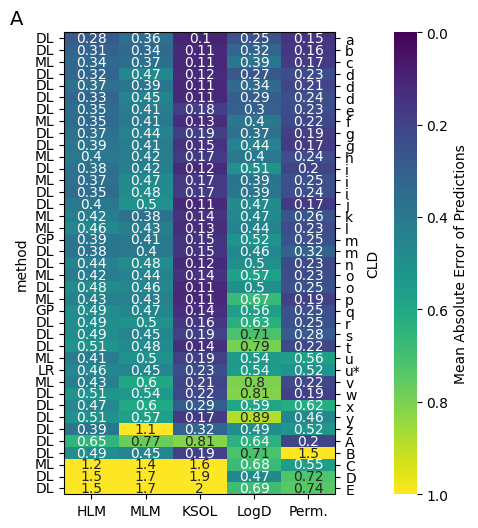

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Select the columns for the heatmap
heatmap_data = agg_df.set_index('method')[['HLM', 'MLM', 'KSOL', 'LogD', 'Perm.']]



# Create the heatmap
fig = plt.figure(figsize=(5, 6))


ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='viridis', 
    cbar_kws={'label': 'Mean Absolute Error of Predictions', "use_gridspec":True, "location":"right", "pad": 0.15}, 
    vmax=1, 
    vmin=0,
    xticklabels=True,  # Keep default x-axis tick labels
    yticklabels=agg_df['type'].values,  # Use the 'cld' column for y-axis labels
)

ax.text(
    -0.2, 1.05, "A", 
    transform=ax.transAxes,
    fontsize=14,
    va='top',
    ha='left',
)

# Invert the colorbar along the x-axis
cbar = ax.collections[0].colorbar  # Access the colorbar
cbar.ax.invert_yaxis() 

# Ensure x-axis labels are not rotated
plt.xticks(rotation=0)


# Create a twin y-axis
ax_right = ax.twinx()

# Match the y-axis limits and ticks
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(len(agg_df['cld'])) + 0.5)
ax_right.set_yticklabels(agg_df['cld'].values)

# Add labels and title
plt.xlabel('ADMET Endpoints')
plt.ylabel('CLD')

# Show the plot
plt.savefig('mae.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
exp_df = pd.DataFrame()
exp_df["cld"] = agg_df["cld"]
exp_df["method"] = agg_df["method"]
exp_df['HLM'] = 10**agg_df['HLM']
exp_df['KSOL'] = 10**agg_df['KSOL']
exp_df['LogD'] = agg_df['LogD']
exp_df['Perm.'] = 10**agg_df['Perm.']
exp_df['MLM'] = 10**agg_df['MLM']
exp_df['type'] = agg_df['type']


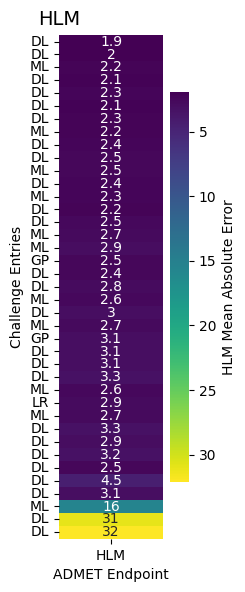

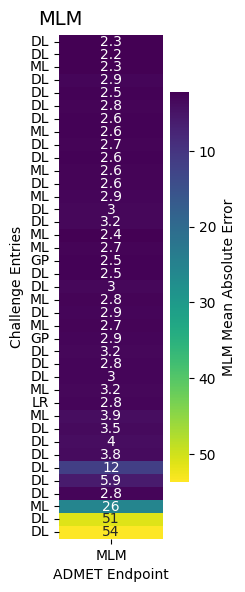

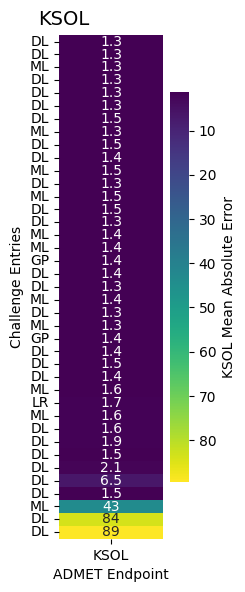

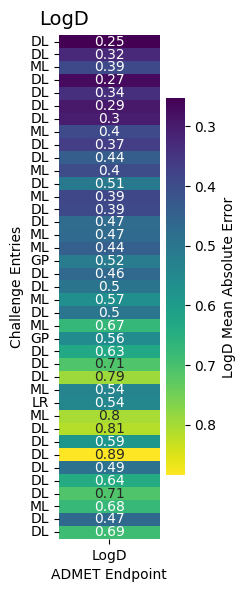

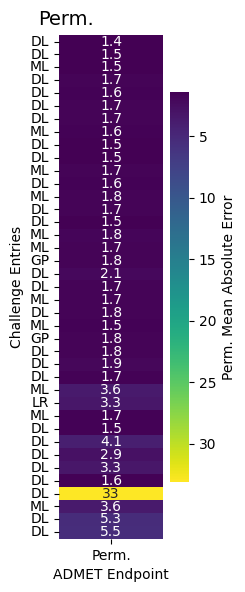

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column and plot a single-column heatmap
for col in ['HLM', 'MLM', 'KSOL', 'LogD', 'Perm.']:
    plt.figure(figsize=(2.5, 6))
    data = exp_df.set_index('method')[[col]]
    ax = sns.heatmap(
        data,
        annot=True,
        cmap='viridis',
        cbar_kws={'label': f'{col} Mean Absolute Error'},
        xticklabels=[col],
        yticklabels=agg_df['type'].values
    )
    ax.text(
        -0.2, 1.05, col, 
        transform=ax.transAxes,
        fontsize=14,
        va='top',
        ha='left',
    )
    cbar = ax.collections[0].colorbar
    cbar.ax.invert_yaxis()
    plt.xticks(rotation=0)
    plt.xlabel('ADMET Endpoint')
    plt.ylabel('Challenge Entries')
    plt.tight_layout()
    plt.savefig(f'mae_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [61]:
agg_df['HLM'] = agg_df['HLM'] / mad_df['HLM'].values[0]
agg_df['KSOL'] = agg_df['KSOL'] / mad_df['KSOL'].values[0]
agg_df['LogD'] = agg_df['LogD'] / mad_df['LogD'].values[0]
agg_df['Perm.'] = agg_df['Perm.'] / mad_df['MDR1-MDCKII'].values[0]
agg_df['MLM'] = agg_df['MLM'] / mad_df['MLM'].values[0]

In [62]:
agg_df

,method,cld,type,HLM,MLM,LogD,KSOL,Perm.
17,competition-prediction-TVwnsb7kFbz72tSvqFjlV,a,DL,0.566422,0.669274,0.267732,0.198247,0.396118
18,competition-prediction-WngQzdppo6KXQsAbjVFLn,b,DL,0.615057,0.638092,0.341704,0.220402,0.422052
2,competition-prediction-5X8yltgjLcHqkJsUMwqNy,c,ML,0.669243,0.681276,0.415653,0.219260,0.452537
34,competition-prediction-salzAVayEdE5bdSjZjcWF,d,DL,0.646892,0.868873,0.287744,0.234107,0.606032
37,competition-prediction-wLj8bdpvbUQ1Ej2iedMJM,d,DL,0.733339,0.729719,0.360878,0.220278,0.541397
12,competition-prediction-MLf57NLNWQ4z2nAjSd6i1,d,DL,0.656070,0.831358,0.310681,0.222968,0.629195
5,competition-prediction-9mdXiMW946HVvNfSl9EKh,e,DL,0.705579,0.770771,0.318834,0.359440,0.601967
16,competition-prediction-TKBSHdBoFKwmBnjFZ2t9i,f,ML,0.691285,0.760691,0.419233,0.253521,0.565189
25,competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN,g,DL,0.741421,0.816117,0.389171,0.363571,0.485400
19,competition-prediction-ajpUtX7qgRCDweYWkd6af,g,DL,0.775014,0.767460,0.465277,0.285190,0.456327


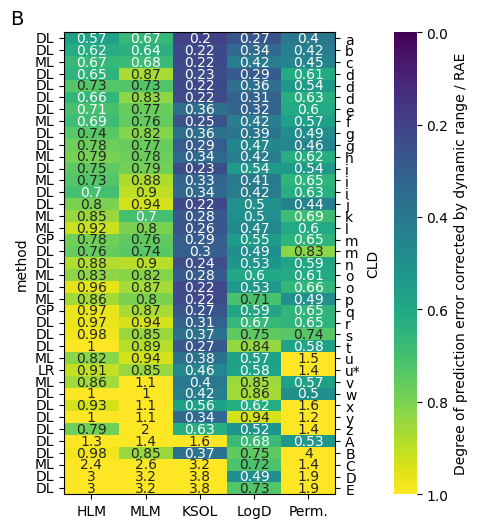

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the heatmap
heatmap_data = agg_df.set_index('method')[['HLM', 'MLM', 'KSOL', 'LogD', 'Perm.']]

# Create the heatmap
plt.figure(figsize=(5, 6))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='viridis', 
    cbar_kws={'label': 'Degree of prediction error corrected by dynamic range / RAE',  "use_gridspec":True, "location":"right", "pad": 0.15}, 
    vmax=1, 
    vmin=0,
    xticklabels=True,  # Keep default x-axis tick labels
    yticklabels=agg_df['type'].values  # Use the 'cld' column for y-axis labels
)

ax.text(
    -0.2, 1.05, "B", 
    transform=ax.transAxes,
    fontsize=14,
    va='top',
    ha='left',
)

# Invert the colorbar along the x-axis
cbar = ax.collections[0].colorbar  # Access the colorbar
cbar.ax.invert_yaxis() 

# Ensure x-axis labels are not rotated
plt.xticks(rotation=0)


# Create a twin y-axis
ax_right = ax.twinx()

# Match the y-axis limits and ticks
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(len(agg_df['cld'])) + 0.5)
ax_right.set_yticklabels(agg_df['cld'].values)

# Add labels and title
plt.xlabel('ADMET Endpoints')
plt.ylabel('CLD')

# Show the plot
plt.savefig('rae.png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
main

,Method,CLD,kendall_tau,kendall_tau_raw,kendall_tau_std,mean_absolute_error,mean_absolute_error_raw,mean_absolute_error_std,mean_squared_error,mean_squared_error_raw,mean_squared_error_std,pearsonr,pearsonr_raw,pearsonr_std,r2,r2_raw,r2_std,spearmanr,spearmanr_raw,spearmanr_std
17,competition-prediction-TVwnsb7kFbz72tSvqFjlV,a,0.564 ± 0.020,0.563961,0.019987,0.230 ± 0.010,0.229807,0.009582,0.112 ± 0.010,0.112279,0.010229,0.800 ± 0.030,0.799556,0.030344,0.625 ± 0.052,0.625279,0.052436,0.724 ± 0.024,0.723742,0.024031
18,competition-prediction-WngQzdppo6KXQsAbjVFLn,b,0.569 ± 0.018,0.569282,0.018355,0.250 ± 0.010,0.249576,0.009928,0.127 ± 0.011,0.127174,0.010639,0.781 ± 0.030,0.780775,0.029517,0.596 ± 0.040,0.596216,0.039522,0.735 ± 0.021,0.735315,0.021498
2,competition-prediction-5X8yltgjLcHqkJsUMwqNy,c,0.514 ± 0.020,0.514365,0.020398,0.276 ± 0.010,0.275847,0.010360,0.150 ± 0.011,0.149604,0.011003,0.734 ± 0.033,0.734315,0.032750,0.525 ± 0.047,0.524815,0.046879,0.673 ± 0.025,0.673073,0.025323
34,competition-prediction-salzAVayEdE5bdSjZjcWF,d,0.495 ± 0.022,0.494544,0.022312,0.283 ± 0.010,0.282792,0.010175,0.153 ± 0.011,0.153109,0.010822,0.724 ± 0.035,0.724091,0.034862,0.496 ± 0.046,0.496407,0.046169,0.641 ± 0.028,0.640622,0.027842
37,competition-prediction-wLj8bdpvbUQ1Ej2iedMJM,d,0.519 ± 0.020,0.518963,0.020070,0.284 ± 0.011,0.284027,0.010709,0.156 ± 0.012,0.155660,0.012179,0.783 ± 0.024,0.782787,0.024145,0.544 ± 0.047,0.543986,0.047284,0.690 ± 0.024,0.689709,0.024491
12,competition-prediction-MLf57NLNWQ4z2nAjSd6i1,d,0.496 ± 0.022,0.496074,0.022182,0.285 ± 0.010,0.284663,0.010172,0.153 ± 0.011,0.152619,0.010785,0.733 ± 0.034,0.732798,0.034061,0.501 ± 0.054,0.501161,0.053922,0.643 ± 0.028,0.642939,0.027662
5,competition-prediction-9mdXiMW946HVvNfSl9EKh,e,0.515 ± 0.021,0.515152,0.020962,0.297 ± 0.010,0.296509,0.010065,0.155 ± 0.012,0.154594,0.011627,0.742 ± 0.026,0.741550,0.025968,0.489 ± 0.056,0.489497,0.056008,0.678 ± 0.026,0.678066,0.025588
16,competition-prediction-TKBSHdBoFKwmBnjFZ2t9i,f,0.481 ± 0.022,0.480777,0.021643,0.299 ± 0.011,0.299364,0.010679,0.166 ± 0.012,0.165899,0.012153,0.735 ± 0.028,0.734701,0.028413,0.516 ± 0.039,0.516243,0.038631,0.640 ± 0.027,0.640202,0.026897
25,competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN,g,0.460 ± 0.021,0.460463,0.020820,0.310 ± 0.010,0.309777,0.010336,0.168 ± 0.012,0.168431,0.012006,0.712 ± 0.031,0.712335,0.030507,0.477 ± 0.046,0.477406,0.046145,0.612 ± 0.027,0.612259,0.026738
19,competition-prediction-ajpUtX7qgRCDweYWkd6af,g,0.467 ± 0.023,0.466942,0.022949,0.312 ± 0.011,0.312109,0.010806,0.185 ± 0.014,0.185355,0.013630,0.695 ± 0.034,0.694847,0.034359,0.433 ± 0.071,0.432919,0.071478,0.627 ± 0.028,0.626782,0.028340


In [65]:
# match by hash and get mae for each endpoint
tau_df = pd.DataFrame()

tau_df["method"] = main["Method"]
tau_df["cld"] = main["CLD"]

tau_df["type"] = main['Method'].map(entry_categories)
tau_df["HLM"] = tau_df['method'].map(HLM_leaderboard.set_index("Method")["kendall_tau_raw"])
tau_df["MLM"] = tau_df['method'].map(MLM_leaderboard.set_index("Method")["kendall_tau_raw"])
tau_df["LogD"] = tau_df['method'].map(LogD_leaderboard.set_index("Method")["kendall_tau_raw"])
tau_df["KSOL"] = tau_df['method'].map(KSOL_leaderboard.set_index("Method")["kendall_tau_raw"])

tau_df["Perm."] = tau_df['method'].map(MDR1_leaderboard.set_index("Method")["kendall_tau_raw"])

In [66]:
tau_df

,method,cld,type,HLM,MLM,LogD,KSOL,Perm.
17,competition-prediction-TVwnsb7kFbz72tSvqFjlV,a,DL,0.624223,0.542510,0.787371,0.188721,0.676978
18,competition-prediction-WngQzdppo6KXQsAbjVFLn,b,DL,0.574159,0.541040,0.767742,0.282380,0.681088
2,competition-prediction-5X8yltgjLcHqkJsUMwqNy,c,ML,0.511546,0.496004,0.727760,0.157304,0.679213
34,competition-prediction-salzAVayEdE5bdSjZjcWF,d,DL,0.542093,0.402429,0.778030,0.087360,0.662808
37,competition-prediction-wLj8bdpvbUQ1Ej2iedMJM,d,DL,0.485964,0.533484,0.729098,0.226121,0.620148
12,competition-prediction-MLf57NLNWQ4z2nAjSd6i1,d,DL,0.543303,0.436948,0.778260,0.077161,0.644698
5,competition-prediction-9mdXiMW946HVvNfSl9EKh,e,DL,0.514317,0.457260,0.737807,0.229710,0.636664
16,competition-prediction-TKBSHdBoFKwmBnjFZ2t9i,f,ML,0.517332,0.463404,0.676568,0.100538,0.646042
25,competition-prediction-late-M4uNdgGuUwwjdkxfSNxFN,g,DL,0.473278,0.402436,0.708229,0.058582,0.659789
19,competition-prediction-ajpUtX7qgRCDweYWkd6af,g,DL,0.439342,0.510017,0.613621,0.147978,0.623751


In [67]:
# for col in ['HLM', 'MLM', 'KSOL', 'LogD', 'Perm']:
#     tau_df[col] = tau_df[col].str.split('±').str[0].astype(float)

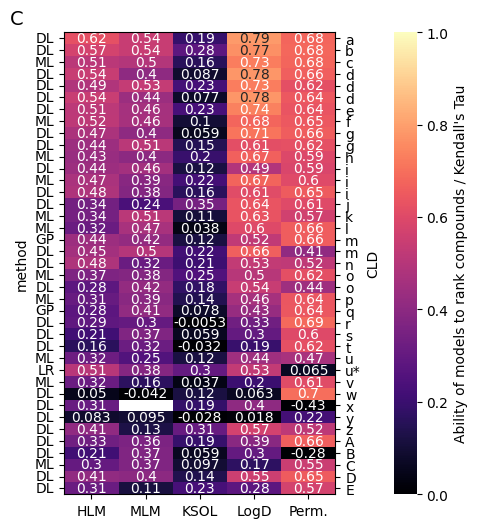

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the heatmap
heatmap_data = tau_df.set_index('method')[['HLM', 'MLM', 'KSOL', 'LogD', 'Perm.']]

# Create the heatmap
plt.figure(figsize=(5, 6))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='magma', 
    cbar_kws={'label': "Ability of models to rank compounds / Kendall's Tau", "use_gridspec":True, "location":"right", "pad": 0.15}, 
    vmax=1, 
    vmin=0,
    xticklabels=True,  # Keep default x-axis tick labels
    yticklabels=agg_df['type'].values  # Use the 'cld' column for y-axis labels
)

ax.text(
    -0.20, 1.05, "C", 
    transform=ax.transAxes,
    fontsize=14,
    va='top',
    ha='left',
)

# Invert the colorbar along the x-axis
cbar = ax.collections[0].colorbar  # Access the colorbar

# Ensure x-axis labels are not rotated
plt.xticks(rotation=0)
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(len(agg_df['cld'])) + 0.5)
ax_right.set_yticklabels(agg_df['cld'].values)


# Add labels and title
plt.xlabel('ADMET Endpoints')
plt.ylabel('CLD')

# Show the plot
plt.savefig('ktau.png', dpi=300, bbox_inches='tight')
plt.show()

In [1]:
!cp mae.png Figure_PanelA.png

In [2]:
!cp rae.png Figure_PanelB.png

In [3]:
!cp ktau.png Figure_PanelC.png